In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()
df.head()
df.dtypes

num_stars                    int64
single_planet_exosystem       bool
discoverymethod             object
disc_year                    int64
disc_facility               object
                            ...   
sy_kmagerr1                float64
sy_kmagerr2                float64
sy_gaiamag                 float64
sy_gaiamagerr1             float64
sy_gaiamagerr2             float64
Length: 63, dtype: object

In [18]:
#Converting Strings to numbers
dictMethod = {}
count = 0
for value in df['discoverymethod']:
    if value not in dictMethod:
        dictMethod[value] = count
        count+=1
df['discoverymethod'] = df['discoverymethod'].map(dictMethod)

dictFac = {}
count2 = 0
for value in df['disc_facility']:
    if value not in dictFac:
        dictFac[value] = count2
        count2+=1
df['disc_facility'] = df['disc_facility'].map(dictFac)

#df['single_planet_exosystem'] = df['single_planet_exosystem'].map({True: 0, False: 1})

dictBmass = {}
count3 = 0
for value in df['pl_bmassprov']:
    if value not in dictBmass:
        dictBmass[value] = count3
        count3+=1
df['pl_bmassprov'] = df['pl_bmassprov'].map(dictBmass)

dictMratio = {}
count4 = 0
for value in df['st_metratio']:
    if value not in dictMratio:
        dictMratio[value] = count4
        count4+=1
df['st_metratio'] = df['st_metratio'].map(dictMratio)

df.dtypes


num_stars                    int64
single_planet_exosystem       bool
discoverymethod              int64
disc_year                    int64
disc_facility                int64
                            ...   
sy_kmagerr1                float64
sy_kmagerr2                float64
sy_gaiamag                 float64
sy_gaiamagerr1             float64
sy_gaiamagerr2             float64
Length: 63, dtype: object

In [19]:
# Splitting the dataset
attr = df.drop('single_planet_exosystem', axis=1)
target = df['single_planet_exosystem']
#attr.head()
# target.head()
#attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 44, shuffle = True)
# target_train.head()
#attr_train.head()
# target_test.head()


In [20]:
# from sklearn.preprocessing import MinMaxScaler
# # Initialize MinMaxScaler
# scaler = MinMaxScaler()
# # Fit and transform the data
# attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
# attr.head()

In [21]:

attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 3, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()
print(attr_train.dtypes)
print(target_train.dtypes)

num_stars            int64
discoverymethod      int64
disc_year            int64
disc_facility        int64
pl_controv_flag      int64
                    ...   
sy_kmagerr1        float64
sy_kmagerr2        float64
sy_gaiamag         float64
sy_gaiamagerr1     float64
sy_gaiamagerr2     float64
Length: 62, dtype: object
bool


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
k_values = [1, 3, 5, 7, 9, 15, 20]

#For each k value, getting accruacy and confusion matrix
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')
    print('')
    print(confusion_matrix(target_test,target_pred))
    print(classification_report(target_test,target_pred))

Accuracy of model with k = 1: 0.7444876783398184%


[[304  59]
 [138 270]]
              precision    recall  f1-score   support

       False       0.69      0.84      0.76       363
        True       0.82      0.66      0.73       408

    accuracy                           0.74       771
   macro avg       0.75      0.75      0.74       771
weighted avg       0.76      0.74      0.74       771

Accuracy of model with k = 3: 0.6329442282749675%


[[247 116]
 [167 241]]
              precision    recall  f1-score   support

       False       0.60      0.68      0.64       363
        True       0.68      0.59      0.63       408

    accuracy                           0.63       771
   macro avg       0.64      0.64      0.63       771
weighted avg       0.64      0.63      0.63       771

Accuracy of model with k = 5: 0.5927367055771725%


[[229 134]
 [180 228]]
              precision    recall  f1-score   support

       False       0.56      0.63      0.59       363
        True

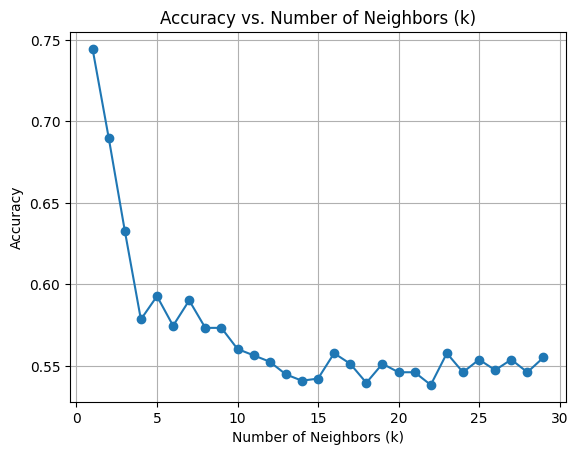

In [23]:
import matplotlib.pyplot as plt

accuracies = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracies.append(accuracy_score(target_test, target_pred))

plt.plot(range(1, 30), accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()